# Task 1: Probability (25 points)
For this task, write a code in Python that generates all the different figures, as requested for each problem.


- A. (5 pts) Plot the probability density function $p(x)$ of a one dimensional Gaussian distribution $N(x; 1, 1)$.
Hint: you might want to look at the library scipy.stats and use the function norm.pdf().
- B. (5 pts) Calculate the probability mass that the random variable $X$ is less than $0$
- C. Consider the new observation variable z, it gives information about the variable x by the likelihood
function $p(z|x) = N (z; x, σ 2 )$, with variance $σ 2 = 0.2$. Apply the Bayes’ theorem to derive the posterior
distribution, $p(x|z)$, given an observation $z = 0.75$ and plot it. For a better comparison, plot the prior
distribution, $p(x)$, too.



## A. (5 pts) 
Plot the probability density function $p(x)$ of a one dimensional Gaussian distribution $N(x; 1, 1)$.

In [1]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

density function (PDF) of the normal distribution is:

$$
f(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}
$$

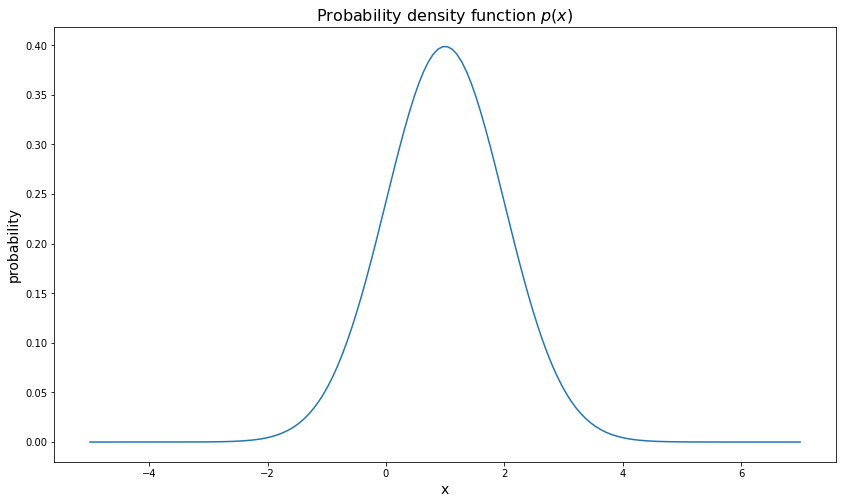

In [2]:
proba = norm(loc=1, scale=1)
x = np.linspace(-5, 7, 150)
p_x = proba.pdf(x)

plt.figure(figsize=(14,8))
plt.plot(x, p_x)
plt.title(r'Probability density function $p(x)$', size=16)
plt.xlabel('x', size=14)
plt.ylabel('probability', size=14)
plt.show()

## B. (5 pts) 
Calculate the probability mass that the random variable $X$ is less than $0$

$$
p(x \leq 0) = \int_{-\infty}^{0}p(x)dx
$$

The cumulative distribution function of a random variable $X$, evaluated at $0$, is the probability that $X$ will take a value less than or equal to $0$. Since the normal distribution is a continuous distribution, the shaded area of the curve represents the probability that $X$ is less or equal than $0$.

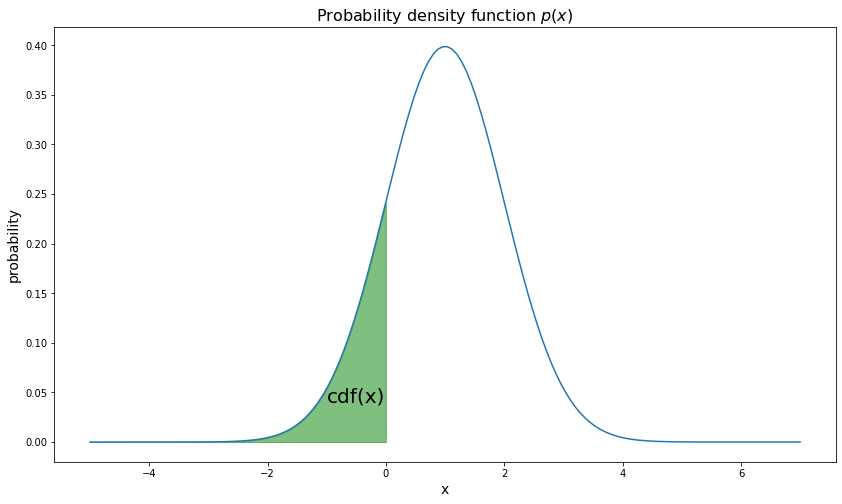

In [3]:
proba = norm(loc=1, scale=1)
x = np.linspace(-5, 7, 150)
p_x = proba.pdf(x)

plt.figure(figsize=(14,8))
plt.plot(x, p_x)

# for fill_between
px = np.linspace(-5, 0, 150)
plt.fill_between(px,proba.pdf(px),alpha=0.5, color='g')
plt.text(-1,0.04,"cdf(x)", fontsize=20)

plt.title(r'Probability density function $p(x)$', size=16)
plt.xlabel('x', size=14)
plt.ylabel('probability', size=14)
plt.show()

In [4]:
print(f'Probability mass that X is less than 0:\n{proba.cdf(0)}')

Probability mass that X is less than 0:
0.15865525393145707


## C. (15 pts)
Consider the new observation variable $z$, it gives information about the variable $x$ by the likelihood
function $p(z|x) = N (z; x, σ^2 )$, with variance $σ^2 = 0.2$. Apply the Bayes’ theorem to derive the posterior
distribution, $p(x|z)$, given an observation $z = 0.75$ and plot it. For a better comparison, plot the prior
distribution, $p(x)$, too.


Applying Bayes theorem we can easily calculate posterior distribution $p(x|z)$. Let's recall Bayes theorem:
$$
p(x|z) = \frac{p(z|x)p(x)}{p(z)}
$$
In our task *Prior* is $p(x) = N(x|1, 1)$


*Likelihood* is $p(z|x) = N(z|x, 0.2)$


*Evidence* or *normlization factor* is $p(z) = \int_{}{}p(z|x)p(x)dx$


In [5]:
z = 0.75
likelihood_var = 0.2

prior = norm(loc=1, scale=1)

### C. 1. Numerical integration
Let's first find normalization factor numericaly by integrating product of likelihood and prior w.r.t. $x$

In [6]:
import scipy.integrate



def numeric_posterior(x, z):
    likelihood_prior = lambda x: norm(loc=x, scale=np.sqrt(0.2)).pdf(z) * prior.pdf(x)
    normalization_const = scipy.integrate.quad(likelihood_prior, -4, 6)[0]

    return likelihood_prior(x) / normalization_const

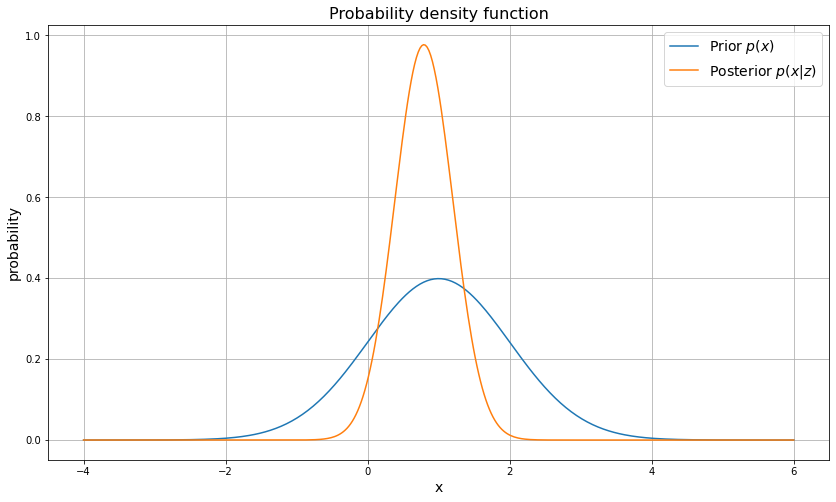

In [7]:
x = np.linspace(-4, 6, 400)
p_x = prior.pdf(x)
posterior = numeric_posterior(x, z)
plt.figure(figsize=(14,8))
plt.plot(x, p_x, label=r'Prior $p(x)$')
plt.plot(x, posterior, label=r'Posterior $p(x|z)$')
plt.title(r'Probability density function', size=16)
plt.xlabel('x', size=14)
plt.ylabel('probability', size=14)
plt.legend(prop={'size': 14})
plt.grid(True)
plt.show()

### C. 2. Conjugate distributions
Let us consider Bayesian estimation of the mean of a univariate Gaussian, whose variance is assumed to be known.


The likelihood is 
$$p\left(D \mid \mu, \sigma^{2}\right)=\prod_{i=1}^{n} p\left(x_{i} \mid \mu, \sigma^{2}\right)=\left(2 \pi \sigma^{2}\right)^{-n / 2} \exp \left\{-\frac{1}{2 \sigma^{2}} \sum_{i=1}^{n}\left(x_{i}-\mu\right)^{2}\right\}$$

Empirical mean and variance
$$
\begin{aligned}
\bar{x} &=\frac{1}{n} \sum_{i=1}^{n} x_{i} \\
s^{2} &=\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}
\end{aligned}
$$

Let's rewrite it in the exponent:

$$
\begin{aligned}
\sum_{i}\left(x_{i}-\mu\right)^{2} &=\sum_{i}\left[\left(x_{i}-\bar{x}\right)-(\mu-\bar{x})\right]^{2} \\
&=\sum_{i}\left(x_{i}-\bar{x}\right)^{2}+\sum_{i}(\bar{x}-\mu)^{2}-2 \sum_{i}\left(x_{i}-\bar{x}\right)(\mu-\bar{x}) \\
&=n s^{2}+n(\bar{x}-\mu)^{2}
\end{aligned}
$$

Since

$$
\begin{aligned}
\sum_{i}\left(x_{i}-\bar{x}\right)(\mu-\bar{x}) &=(\mu-\bar{x})\left(\left(\sum_{i} x_{i}\right)-n \bar{x}\right)=(\mu-\bar{x})(n \bar{x}-n \bar{x})=0
\end{aligned}
$$

Hence

$$
\begin{aligned}
p\left(D \mid \mu, \sigma^{2}\right) &=\frac{1}{(2 \pi)^{n / 2}} \frac{1}{\sigma^{n}} \exp \left(-\frac{1}{2 \sigma^{2}}\left[n s^{2}+n(\bar{x}-\mu)^{2}\right]\right) \\
& \propto\left(\frac{1}{\sigma^{2}}\right)^{n / 2} \exp \left(-\frac{n}{2 \sigma^{2}}(\bar{x}-\mu)^{2}\right) \exp \left(-\frac{n s^{2}}{2 \sigma^{2}}\right)
\end{aligned}
$$

Since variance is a constant, we derive

$$
p(D \mid \mu) \propto \exp \left(-\frac{n}{2 \sigma^{2}}(\bar{x}-\mu)^{2}\right) \propto \mathcal{N}\left(\bar{x} \mid \mu, \frac{\sigma^{2}}{n}\right)
$$

And this leads to the **conjugate prior** that has the form

$$
p(\mu) \propto \exp \left(-\frac{n}{2 \sigma_0^{2}}(\bar{x}-\mu_0)^{2}\right) \propto \mathcal{N}\left(\bar{x} \mid \mu_0, \sigma_0^{2}\right)
$$

Where $\mu_0$ and $\sigma_0^{2}$ mean and variance of the prior.


Hence the posterior is given by

$$
\begin{aligned}
p(\mu \mid D) & \propto p(D \mid \mu, \sigma) p\left(\mu \mid \mu_{0}, \sigma_{0}^{2}\right) \\
& \propto \exp \left[-\frac{1}{2 \sigma^{2}} \sum_{i}\left(x_{i}-\mu\right)^{2}\right] \times \exp \left[-\frac{1}{2 \sigma_{0}^{2}}\left(\mu-\mu_{0}\right)^{2}\right] \\
&=\exp \left[\frac{-1}{2 \sigma^{2}} \sum_{i}\left(x_{i}^{2}+\mu^{2}-2 x_{i} \mu\right)+\frac{-1}{2 \sigma_{0}^{2}}\left(\mu^{2}+\mu_{0}^{2}-2 \mu_{0} \mu\right)\right]
\end{aligned}
$$

Since the product of two Gaussians is a Gaussian, we have

$$
\begin{aligned}
p(\mu \mid D) & \propto \exp \left[-\frac{\mu^{2}}{2}\left(\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}\right)+\mu\left(\frac{\mu_{0}}{\sigma_{0}^{2}}+\frac{\sum_{i} x_{i}}{\sigma^{2}}\right)-\left(\frac{\mu_{0}^{2}}{2 \sigma_{0}^{2}}+\frac{\sum_{i} x_{i}^{2}}{2 \sigma^{2}}\right)\right] \\
& \stackrel{\text { def }}{=} \exp \left[-\frac{1}{2 \sigma_{n}^{2}}\left(\mu^{2}-2 \mu \mu_{n}+\mu_{n}^{2}\right)\right]=\exp \left[-\frac{1}{2 \sigma_{n}^{2}}\left(\mu-\mu_{n}\right)^{2}\right]
\end{aligned}
$$

Hence after some calculations

$$
\begin{aligned}
\frac{-\mu^{2}}{2 \sigma_{n}^{2}} &=\frac{-\mu^{2}}{2}\left(\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}\right) \\
\frac{1}{\sigma_{n}^{2}} &=\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}
\end{aligned}
$$

we find $\sigma_{n}^{2}$

$$
\begin{aligned}
\sigma_{n}^{2} &=\frac{\sigma^{2} \sigma_{0}^{2}}{n \sigma_{0}^{2}+\sigma^{2}}=\frac{1}{\frac{n}{\sigma^{2}}+\frac{1}{\sigma_{0}^{2}}}
\end{aligned}
$$

And $\mu_{n}$

$$
\begin{gathered}
\frac{-2 \mu \mu_{n}}{-2 \sigma_{n}^{2}}=\mu\left(\frac{\sum_{i=1}^{n} x_{i}}{\sigma^{2}}+\frac{\mu_{0}}{\sigma_{0}^{2}}\right) \\
\frac{\mu_{n}}{\sigma_{n}^{2}}=\frac{\sum_{i=1}^{n} x_{i}}{\sigma^{2}}+\frac{\mu_{0}}{\sigma_{0}^{2}} \\
=\frac{\sigma_{0}^{2} n \bar{x}+\sigma^{2} \mu_{0}}{\sigma^{2} \sigma_{0}^{2}} \\
\mu_{n}=\frac{\sigma^{2}}{n \sigma_{0}^{2}+\sigma^{2}} \mu_{0}+\frac{n \sigma_{0}^{2}}{n \sigma_{0}^{2}+\sigma^{2}} \bar{x}=\sigma_{n}^{2}\left(\frac{\mu_{0}}{\sigma_{0}^{2}}+\frac{n \bar{x}}{\sigma^{2}}\right)
\end{gathered}
$$

In [8]:
def conj_posterior(x, z):
    var = 1 / (1 / prior.std() + len(z) / 0.2)
    loc = var * (prior.mean() / prior.std() + np.sum(z) / 0.2)
    return norm(loc=loc, scale=np.sqrt(var))

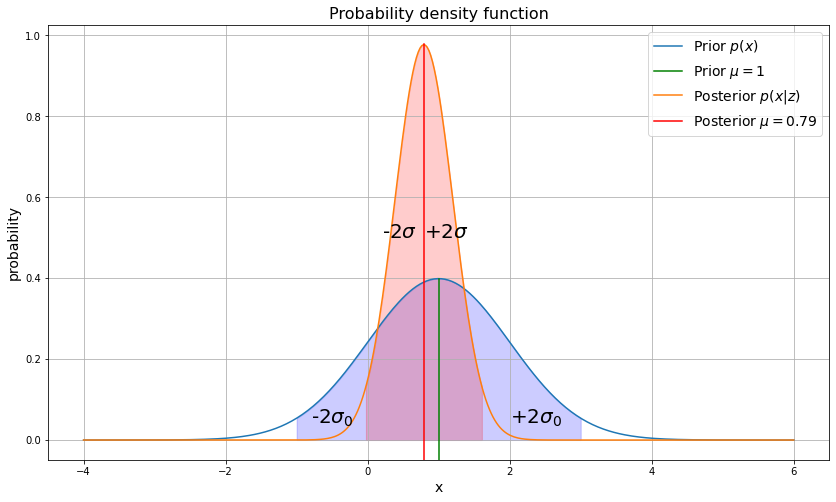

In [9]:
x = np.linspace(-4, 6, 400)
p_x = prior.pdf(x)
posterior = conj_posterior(x, [z])
plt.figure(figsize=(14,8))

plt.plot(x, p_x, label=r'Prior $p(x)$')
plt.axvline(
    x=prior.mean(), 
    ymin=prior.pdf(x).min(), 
    ymax=(prior.pdf(x).max() + 0.017), 
    color='g', label=r'Prior $\mu =1$'
    )
# for fill_between
prior_conf_interval = np.linspace(
    prior.mean() - 2*prior.std(),
    prior.mean() + 2*prior.std(),
    150
    )
plt.fill_between(prior_conf_interval,prior.pdf(prior_conf_interval),alpha=0.2, color='b')
plt.text(-0.8,0.04,r"-2$\sigma_0$", fontsize=20)
plt.text(2,0.04,r"+2$\sigma_0$", fontsize=20)

plt.plot(x, posterior.pdf(x), label=r'Posterior $p(x|z)$')
plt.axvline(
    x=posterior.mean(), 
    ymin=posterior.pdf(x).min(), 
    ymax=(posterior.pdf(x).max() - 0.02), 
    color='r', label=r'Posterior $\mu =0.79$'
    )
# for fill_between
posterior_conf_interval = np.linspace(
    posterior.mean() - 2*posterior.std(),
    posterior.mean() + 2*posterior.std(),
    150
    )
plt.fill_between(posterior_conf_interval,posterior.pdf(posterior_conf_interval),alpha=0.2, color='r')
plt.text(0.2,0.5,r"-2$\sigma$", fontsize=20)
plt.text(0.8,0.5,r"+2$\sigma$", fontsize=20)

plt.title(r'Probability density function', size=16)
plt.xlabel('x', size=14)
plt.ylabel('probability', size=14)
plt.legend(prop={'size': 14})
plt.grid(True)
plt.show()

## Summary
The idea of the Bayesian method is to compute the posterior for every data point. After having our prior knowledge, and updating it with the likelihood for only one data point, what we have is the prior knowledge of any other new data points. And even one update of prior knowledge gives us new information about data distribution. Like in our example:
- after updating prior distribution by calculation the posterior we update our confidence interval. Posterior's $\sigma$ is less than prior's $\sigma$, hence Posterior's pdf is more narrow and the width of its confidence (credible) interval is less then prior's. Posterior's $\mu$ is apdated as well. We can say that after observing $z=0.75$ 95% of samples of $x$ r.v. are more likely concentrated between $+-0.82$, while in prior distribution the interval was wider.


# Task 2: Multivariate Gaussian (25 points)

- A. (10 pts) Write the function plot2dcov which plots the 2d contour given three core parameters: mean,
covariance, and the iso-contour value $k$. You may add any other parameter such as color, number of points,
etc.
- B. (5 pts) Write the equation of sample mean and sample covariance of a set of points $\{x_i\}$, in vector form as
was shown during the lecture. You can provide your solution by using Markdown, latex, by hand, etc.
- C. (10 pts) Draw random samples from a multivariate normal distribution. You can use the python function that draws samples univariate normal distribution $N(0, 1)$. In particular, draw and plot 200 samples
$\mathcal{N}\left(\left[\begin{array}{l}
2 \\
2
\end{array}\right],\left[\begin{array}{cc}
1 & 1.3 \\
1.3 & 3
\end{array}\right]\right)
$; also plot their corresponding 1-sigma iso-contour. Then calculate the samplemean and covariance in vector form and plot again the 1-sigma iso-contour for the estimated Gaussian parameters. Run the experiment multiple times and try different number of samples. Comment on the results.



## A. (10 pts) 
Write the function plot2dcov which plots the 2d contour given three core parameters: mean,
covariance, and the iso-contour value $k$. You may add any other parameter such as color, number of points,
etc.

In [10]:
import numpy as np

from scipy.stats import norm
from scipy.linalg import cholesky


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [11]:
def plot2dcov(mean, cov, color, label, k=1, n_points=60):

    Cholesky = cholesky(cov, lower=True)

    angles = np.linspace(0, 2 * np.pi, n_points)
    x_old = k * np.cos(angles)
    y_old = k * np.sin(angles)

    coords = np.stack((x_old, y_old), 1)
    contour = coords @ Cholesky.T + mean.reshape(1, 2) 

    plt.plot(contour[:, 0], contour[:, 1], color=color, label=label)
    plt.xlabel('x_1', size=14)
    plt.ylabel('x_2', size=14)

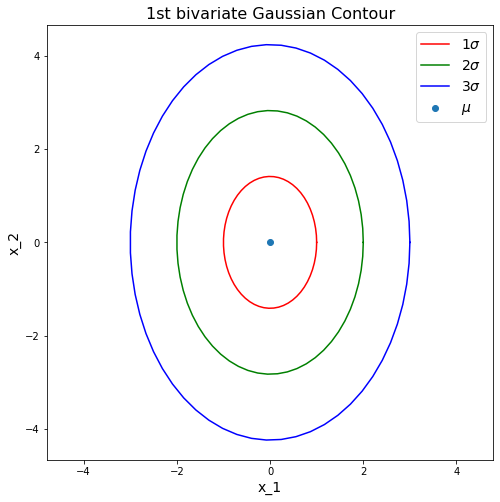

In [12]:
mean_1 = np.array([0, 0])
cov_1 = np.array([[1, 0], [0, 2]])

plt.figure(figsize=(8,8))

plt.title(r'1st bivariate Gaussian Contour', size=16)
plot2dcov(mean_1, cov_1, color='r', label=f'{1}$\sigma$')
plot2dcov(mean_1, cov_1, k=2, color='g', label=f'{2}$\sigma$')
plot2dcov(mean_1, cov_1, k=3, color='b', label=f'{3}$\sigma$')
plt.scatter(mean_1[0], mean_1[1], label='$\mu$')
plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()

Here $X_1$ and $X_2$ are uncorrelated since $\sigma_{12} = \sigma_{21} = 0$. 

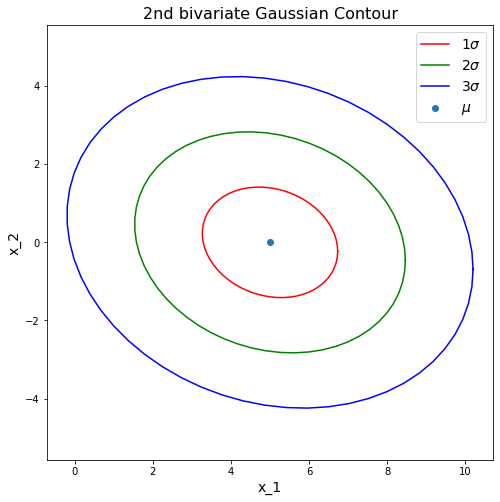

In [13]:
mean_2 = np.array([5, 0])
cov_2 = np.array([[3, -0.4], [-0.4, 2]])


plt.figure(figsize=(8,8))

plt.title(r'2nd bivariate Gaussian Contour', size=16)
plot2dcov(mean_2, cov_2, color='r', label=f'{1}$\sigma$')
plot2dcov(mean_2, cov_2, k=2, color='g', label=f'{2}$\sigma$')
plot2dcov(mean_2, cov_2, k=3, color='b', label=f'{3}$\sigma$')
plt.scatter(mean_2[0], mean_2[1], label='$\mu$')
plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()

Small negative correlation between $X_1$ and $X_2$: $$\sigma_{12} = \sigma_{21} = -0.4$$ 

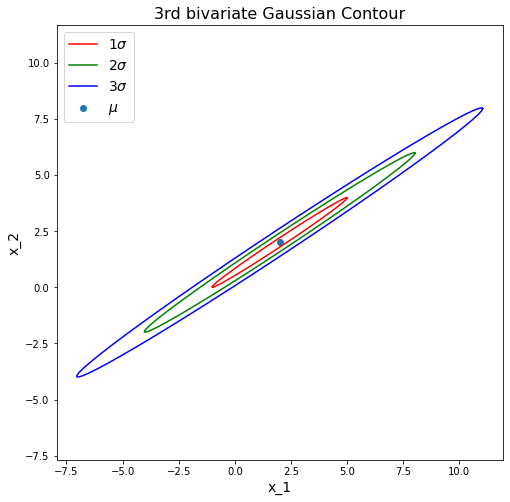

In [14]:
mean_3 = np.array([2, 2])
cov_3 = np.array([[9.1, 6], [6, 4]])

plt.figure(figsize=(8,8))

plt.title(r'3rd bivariate Gaussian Contour', size=16)
plot2dcov(mean_3, cov_3, color='r', label=f'{1}$\sigma$')
plot2dcov(mean_3, cov_3, k=2, color='g', label=f'{2}$\sigma$')
plot2dcov(mean_3, cov_3, k=3, color='b', label=f'{3}$\sigma$')
plt.scatter(mean_3[0], mean_3[1], label='$\mu$')
plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()


Strong positive correlation between $X_1$ and $X_2$: $$\sigma_{12} = \sigma_{21} = 6$$ 

## B. (5 pts) 
Write the equation of sample mean and sample covariance of a set of points $\{x_i\}$, in vector form as
was shown during the lecture. You can provide your solution by using Markdown, latex, by hand, etc.

Let's say we have r.v. $x_i$ ~ $p(x)$ and $x_i$ is i.i.d.


Sample mean

$$
\bar{x}=\frac{1}{N} \sum_{i=1}^{N} x_{i}
$$
Sample covariance (unbiased estimate)
$$
\bar{\Sigma}_{x}=\frac{1}{N-1} \sum_{i=1}^{N}\left(x_{i}-\bar{x}\right)\left(x_{i}-\bar{x}\right)^{\top}
$$

## C. (10 pts) 
Draw random samples from a multivariate normal distribution. You can use the python function that draws samples univariate normal distribution $N(0, 1)$. In particular, draw and plot 200 samples
$\mathcal{N}\left(\left[\begin{array}{l}
2 \\
2
\end{array}\right],\left[\begin{array}{cc}
1 & 1.3 \\
1.3 & 3
\end{array}\right]\right)
$; also plot their corresponding 1-sigma iso-contour. 



In [15]:
from scipy.stats import multivariate_normal


mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])

bivariate_norm = multivariate_normal(mean=mean, cov=cov)

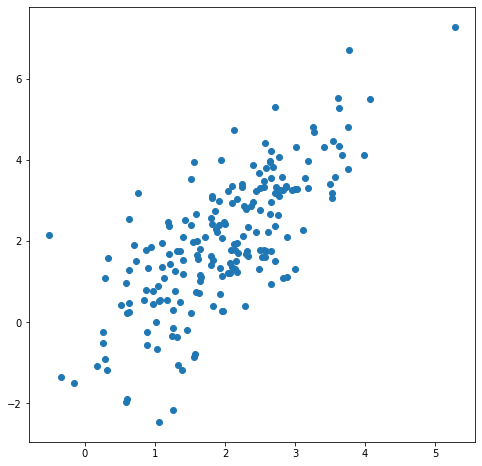

In [16]:
sample = bivariate_norm.rvs(size=200, random_state=42)

plt.figure(figsize=(8,8))

plt.scatter(sample[:, 0], sample[:, 1])
plt.show()

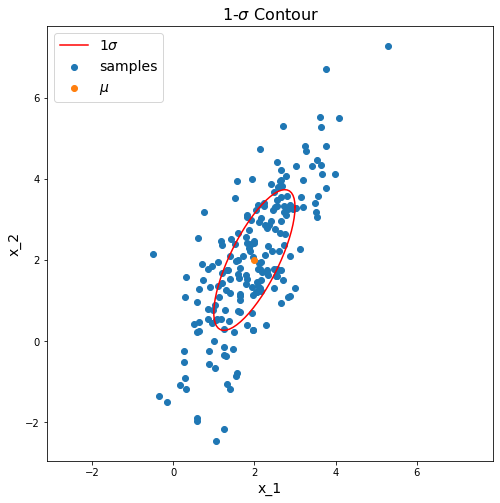

In [17]:
plt.figure(figsize=(8,8))

plt.title(r'1-$\sigma$ Contour', size=16)
plot2dcov(mean, cov, color='r', label=f'{1}$\sigma$')
plt.scatter(sample[:, 0], sample[:, 1], label='samples')
plt.scatter(mean[0], mean[1], label='$\mu$')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()


Then calculate the sample *mean* and *covariance* in vector form and plot again the 1-sigma iso-contour for the estimated Gaussian parameters. Run the experiment multiple times and try different number of samples. Comment on the results.

In [18]:
sample_mean = sample.sum(axis=0) / len(sample)
print(f'Sample Mean: {sample_mean}')

sample_cov = ((sample - sample_mean).T @ (sample - sample_mean))/ (len(sample) - 1)
print(f'Sample Covariance: \n{sample_cov}')

Sample Mean: [1.97379703 1.99941458]
Sample Covariance: 
[[0.89769311 1.17243906]
 [1.17243906 2.77676566]]


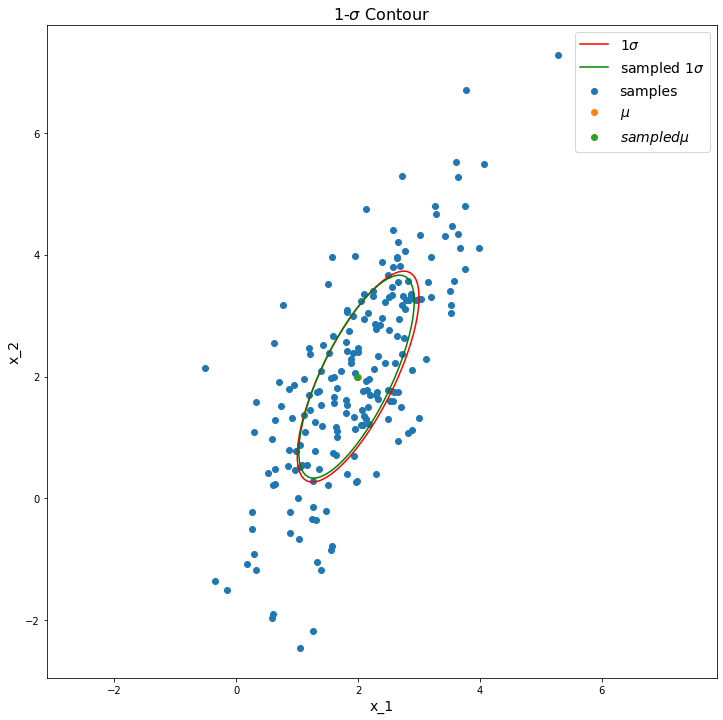

In [19]:
plt.figure(figsize=(12,12))

plt.title(r'1-$\sigma$ Contour', size=16)
plot2dcov(mean, cov, color='r', label=f'{1}$\sigma$')
plot2dcov(sample_mean, sample_cov, color='g', label=f'sampled {1}$\sigma$')
plt.scatter(sample[:, 0], sample[:, 1], label='samples')
plt.scatter(mean[0], mean[1], label='$\mu$')
plt.scatter(sample_mean[0], sample_mean[1], label='$sampled \mu$')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()


Let's increase amount of samples

Sample Mean: [1.97809428 2.00312787]
Sample Covariance: 
[[0.92635511 1.19108447]
 [1.19108447 2.83184519]]


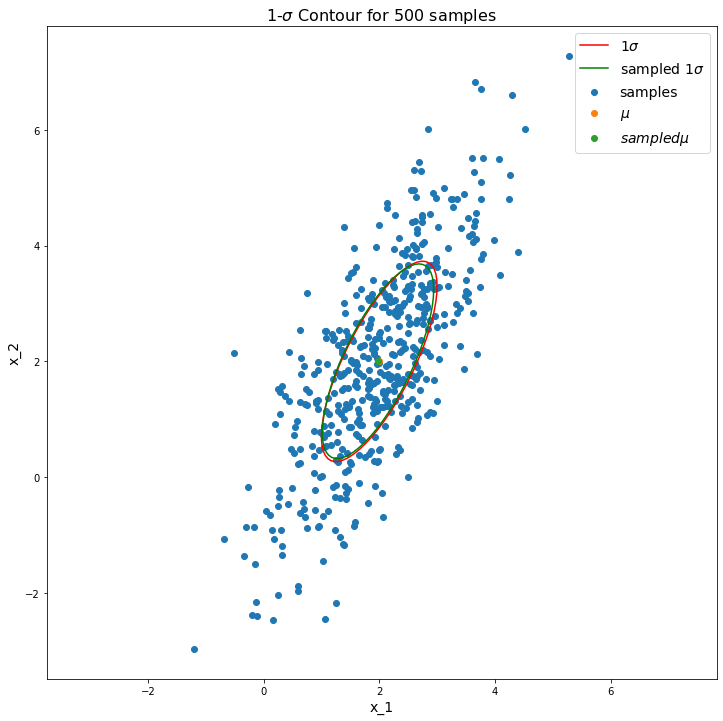

Sample Mean: [1.94136267 1.9582973 ]
Sample Covariance: 
[[0.95751591 1.18880402]
 [1.18880402 2.77916132]]


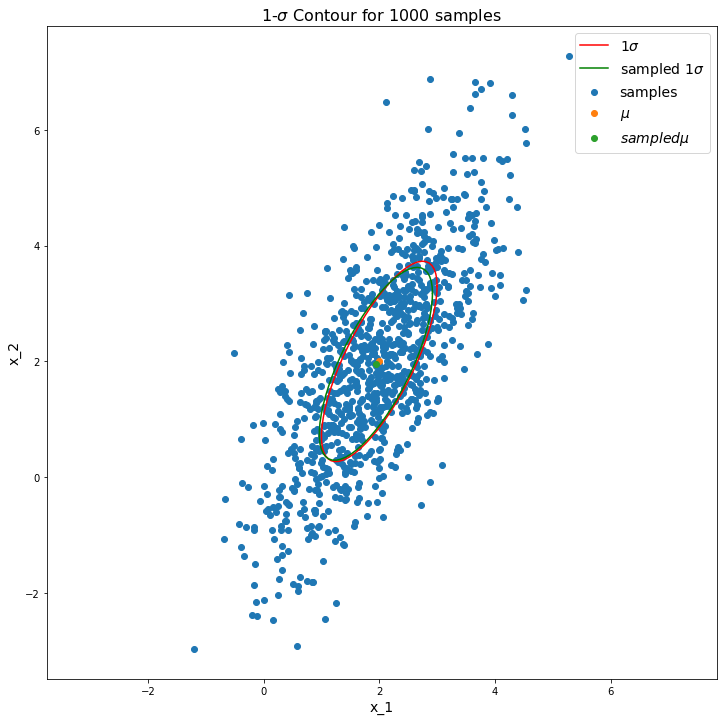

Sample Mean: [1.9757963  1.98813255]
Sample Covariance: 
[[1.00348103 1.26955166]
 [1.26955166 2.89597708]]


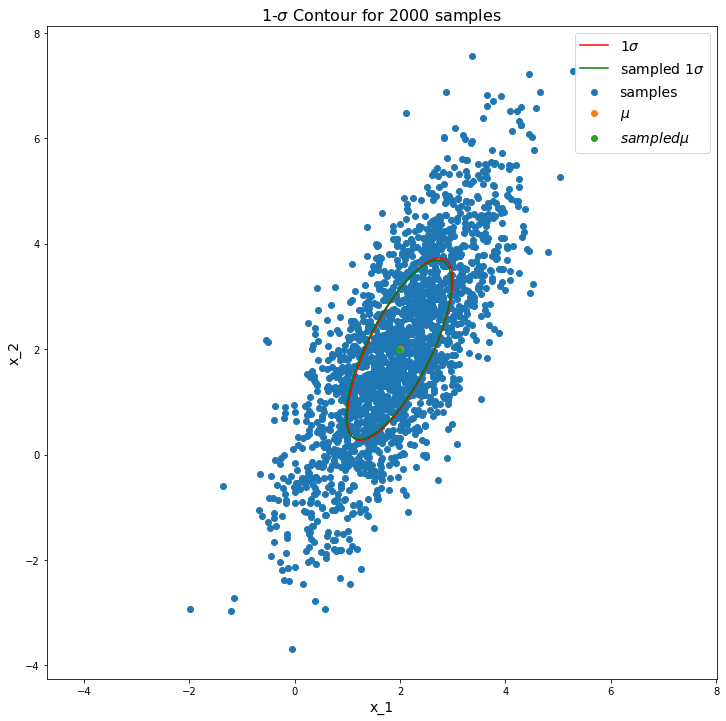

Sample Mean: [2.00363992 1.99763053]
Sample Covariance: 
[[1.00417781 1.29756408]
 [1.29756408 3.01936282]]


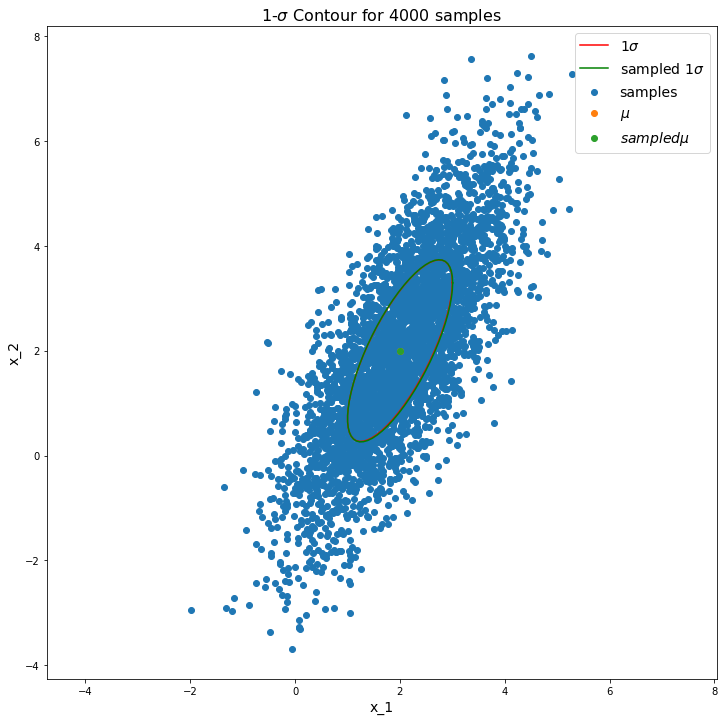

Sample Mean: [2.00857091 2.01023857]
Sample Covariance: 
[[0.99987227 1.30329949]
 [1.30329949 3.01793413]]


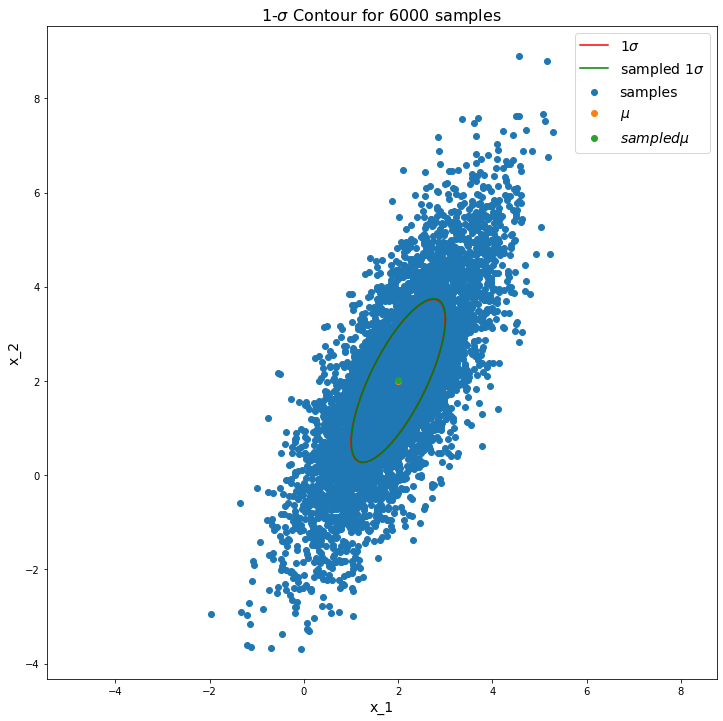

In [20]:
sample_size = [500, 1000, 2000, 4000, 6000]

for size in sample_size:
    sample = bivariate_norm.rvs(size=size, random_state=42)

    sample_mean = sample.sum(axis=0) / len(sample)
    print(f'Sample Mean: {sample_mean}')

    sample_cov = ((sample - sample_mean).T @ (sample - sample_mean))/ (len(sample) - 1)
    print(f'Sample Covariance: \n{sample_cov}')

    plt.figure(figsize=(12,12))

    plt.title(f'1-$\sigma$ Contour for {size} samples', size=16)
    plot2dcov(mean, cov, color='r', label=f'{1}$\sigma$')
    plot2dcov(sample_mean, sample_cov, color='g', label=f'sampled {1}$\sigma$')
    plt.scatter(sample[:, 0], sample[:, 1], label='samples')
    plt.scatter(mean[0], mean[1], label='$\mu$')
    plt.scatter(sample_mean[0], sample_mean[1], label='$sampled \mu$')

    plt.axes().set_aspect('equal', 'datalim')
    plt.legend(prop={'size': 14})

    plt.show()


And let's decrease amount of samples

Sample Mean: [2.07908967 2.20682256]
Sample Covariance: 
[[0.8349497  0.93483044]
 [0.93483044 2.19330791]]


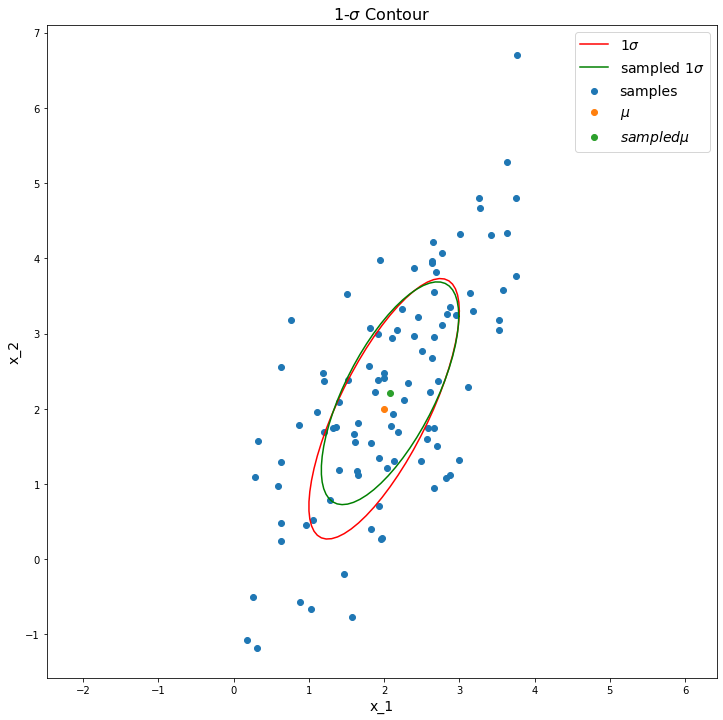

In [21]:
sample = bivariate_norm.rvs(size=100, random_state=42)

sample_mean = sample.sum(axis=0) / len(sample)
print(f'Sample Mean: {sample_mean}')

sample_cov = ((sample - sample_mean).T @ (sample - sample_mean))/ (len(sample) - 1)
print(f'Sample Covariance: \n{sample_cov}')

plt.figure(figsize=(12,12))

plt.title(r'1-$\sigma$ Contour', size=16)
plot2dcov(mean, cov, color='r', label=f'{1}$\sigma$')
plot2dcov(sample_mean, sample_cov, color='g', label=f'sampled {1}$\sigma$')
plt.scatter(sample[:, 0], sample[:, 1], label='samples')
plt.scatter(mean[0], mean[1], label='$\mu$')
plt.scatter(sample_mean[0], sample_mean[1], label='$sampled \mu$')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()


An increase in the number of observations led to a more accurate sample mean and sample variance calculations. But already with 500 observations sample means and variances became very close to the ground truth. Further increasing of observations was more helpful for correcting the correlation elements of covariance matrix.For 6000 samples $1\sigma$ contours coincide.


Obviously, decreasing in the number of samples led to a less accurate calculations for sample mean and covariance matrix. Hence $1\sigma$ contours are quite different    

# Task 3: Covariance Propagation (25 points)

For this task, we will model an omni-directional robotic platform, i.e., a holonomic platform moving as a free
point without restrictions.


The propagation model is the following:
$$
\left[\begin{array}{l}
x \\
y
\end{array}\right]_{t}=\left[\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right]_{t-1}+\left[\begin{array}{cc}
\Delta t & 0 \\
0 & \Delta t
\end{array}\right]\left[\begin{array}{l}
v_{x} \\
v_{y}
\end{array}\right]_{t}+\left[\begin{array}{l}
\eta_{x} \\
\eta_{y}
\end{array}\right]_{t}
$$

where the controls $u=\left[v_x, v_y\right]^{\top}$ are the velocities which are commanded to the robot. Unfortunately, there exists some uncertainty on command execution 

$$
\left[\begin{array}{l}
\eta_{x} \\
\eta_{y}
\end{array}\right]_{t} \sim \mathcal{N}\left(\left[\begin{array}{l}
0 \\
0
\end{array}\right],\left[\begin{array}{cc}
0.1 & 0 \\
0 & 0.1
\end{array}\right]\right)
$$

We will consider a time step of $∆t = 0.5$.

In [22]:
import numpy as np

from scipy.stats import norm
from scipy.linalg import cholesky
from scipy.stats import multivariate_normal


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [23]:
def plot2dcov(mean, cov, color, label, k=1, n_points=60):

    Cholesky = cholesky(cov, lower=True)

    angles = np.linspace(0, 2 * np.pi, n_points)
    x_old = k * np.cos(angles)
    y_old = k * np.sin(angles)

    coords = np.stack((x_old, y_old), 1)
    contour = coords @ Cholesky.T + mean.reshape(1, 2) 

    plt.plot(contour[:, 0], contour[:, 1], color=color, label=label)
    plt.xlabel('x_1', size=14)
    plt.ylabel('x_2', size=14)

## A. (5 pts) 
Write the equations corresponding to the mean and covariance after a single propagation of the
holonomic platform. How can we use this result iteratively?

$$
\bar{\mu}_{t}=A_{t} \mu_{t-1}+B_{t} u_{t}
$$
$$\bar{\Sigma}_{t}=A_{t} \cdot \Sigma_{t-1} \cdot A_{t}^{T}+R$$

## B. (5 pts) 
Draw the propagation state PDF (1-sigma iso-contour) for times indexes $t = 0, . . . , 5$ and the control sequence $u_t = [3, 0]^{\top}$ for all times $t$. The PDF for the initial state is

$$
\left[\begin{array}{l}
x \\
y
\end{array}\right]_{0} \sim \mathcal{N}\left(\left[\begin{array}{l}
0 \\
0
\end{array}\right],\left[\begin{array}{cc}
0.1 & 0 \\
0 & 0.1
\end{array}\right]\right)
$$

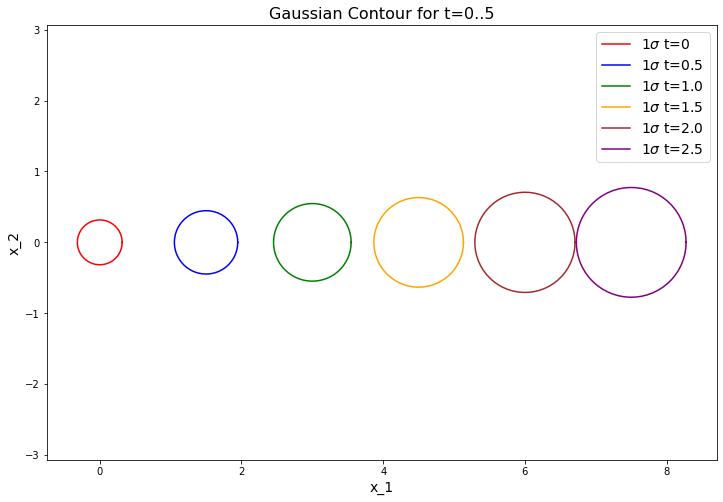

In [24]:
A = np.eye(2)
dt = 0.5
B = dt * np.eye(2)
u = np.array([3, 0])

# time = 0
mean_0 = np.array([0, 0])
cov_0 = np.array([[0.1, 0], [0, 0.1]])

eta_mean = np.array([0, 0])
eta_cov = np.array([[0.1, 0], [0, 0.1]])

# plot the initial state
plt.figure(figsize=(12,8))
plt.title(r'Gaussian Contour for t=0..5', size=16)

plot2dcov(mean_0, cov_0, color='r', label=f'{1}$\sigma$ t={0}')

cmap = ['b', 'g', 'orange', 'brown', 'purple']
for t in range(1, 6):
    mean_0 = A.dot(mean_0) + B @ u
    cov_0 = A @ cov_0 @ A.T + eta_cov
    plot2dcov(mean_0, cov_0, color=cmap[t-1], label=f'{1}$\sigma$ t={t*dt}')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()

## C. (5 pts) 
Somehow, the platform is malfunctioning; thus, it is moving strangely and its propagation model has changed

$$
\left[\begin{array}{l}
x \\
y
\end{array}\right]_{t}=\left[\begin{array}{ll}
1 & 0.3 \\
0 & 1
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right]_{t-1}+\left[\begin{array}{cc}
\Delta t & 0 \\
0 & \Delta t
\end{array}\right]\left[\begin{array}{l}
v_{x} \\
v_{y}
\end{array}\right]_{t}+\left[\begin{array}{l}
\eta_{x} \\
\eta_{y}
\end{array}\right]_{t}
$$

All the other parameters and controls are the same. 


Draw the propagation state PDF (1-sigma iso-contour and 500 particles) for times indexes $t = 0, . . . , 5$

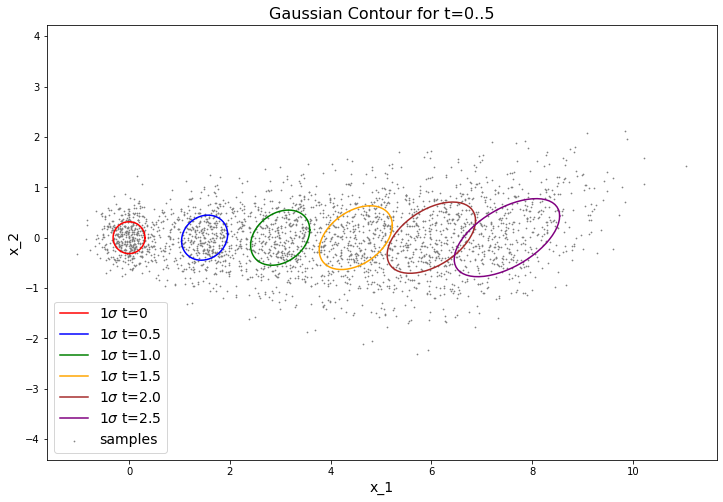

In [25]:
A = np.array([[1, 0.3], [0, 1]])
dt = 0.5
B = dt * np.eye(2)
u = np.array([3, 0])

# time = 0
mean_0 = np.array([0, 0])
cov_0 = np.array([[0.1, 0], [0, 0.1]])

size = 500
sample = multivariate_normal(mean=mean_0, cov=cov_0).rvs(size=size, random_state=42)


eta_mean = np.array([0, 0])
eta_cov = np.array([[0.1, 0], [0, 0.1]])

# plot the initial state
plt.figure(figsize=(12,8))
plt.title(r'Gaussian Contour for t=0..5', size=16)

plot2dcov(mean_0, cov_0, color='r', label=f'{1}$\sigma$ t={0}')
plt.scatter(sample[:, 0], sample[:, 1], s=0.5, c='gray', marker='o', label='samples')

cmap = ['b', 'g', 'orange', 'brown', 'purple']
for t in range(1, 6):
    mean_0 = A.dot(mean_0) + B @ u
    cov_0 = A @ cov_0 @ A.T + eta_cov
    sample = multivariate_normal(mean=mean_0, cov=cov_0).rvs(size=size, random_state=42)
    plot2dcov(mean_0, cov_0, color=cmap[t-1], label=f'{1}$\sigma$ t={t*dt}')
    plt.scatter(sample[:, 0], sample[:, 1], s=0.5, c='gray', marker='o')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()

## D. (5 pts)
$$
\left[\begin{array}{l}
x \\
y \\
\theta
\end{array}\right]_{t}=\left[\begin{array}{lll}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right]\left[\begin{array}{l}
x \\
y \\
\theta
\end{array}\right]_{t-1}+\left[\begin{array}{cc}
\cos (\theta) \Delta t & 0 \\
\sin (\theta) \Delta t & 0 \\
0 & \Delta t
\end{array}\right]\left[\begin{array}{c}
v \\
w
\end{array}\right]_{t}+\left[\begin{array}{l}
\eta_{x} \\
\eta_{y} \\
\eta_{\theta}
\end{array}\right]_{t} \text {, being }\left[\begin{array}{c}
\eta_{x} \\
\eta_{y} \\
\eta_{\theta}
\end{array}\right]_{t} \sim \mathcal{N}\left(\left[\begin{array}{c}
0 \\
0 \\
0
\end{array}\right],\left[\begin{array}{ccc}
0.2 & 0 & 0 \\
0 & 0.2 & 0 \\
0 & 0 & 0.1
\end{array}\right]\right)
$$
and the PDF for the initial state
$$
\left[\begin{array}{l}
x \\
y \\
\theta
\end{array}\right]_{0} \sim \mathcal{N}\left(\left[\begin{array}{l}
0 \\
0 \\
0
\end{array}\right],\left[\begin{array}{ccc}
0.1 & 0 & 0 \\
0 & 0.1 & 0 \\
0 & 0 & 0.5
\end{array}\right]\right)
$$
Propagate, as explained in class (linearize plus covariance propagation), for five time intervals, using the
control $u_t = [3, 1.5]^{\top}$ showing the propagated Gaussian by plotting the 1-sigma iso-contour. Angles are in
radians. Hint: you can marginalize out $θ$ and plot the corresponding $Σ_{xy}$ as explained in class.

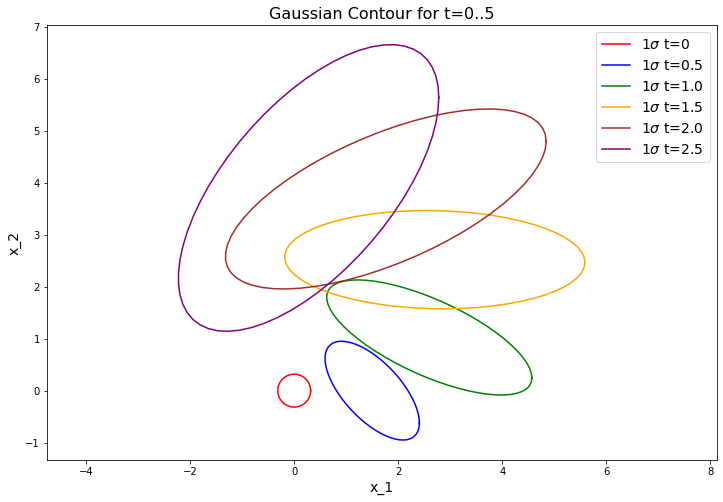

In [26]:
cov = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])

A = np.eye(3)
u = np.array([3, 1.5])
mean = np.array([0, 0, 0])

eta_mean = np.array([0, 0, 0])
eta_cov = np.array([[0.2, 0, 0], [0, 0.2, 0], [0, 0, 0.1]])


# plot the initial state
plt.figure(figsize=(12,8))
plt.title(r'Gaussian Contour for t=0..5', size=16)

plot2dcov(mean[:2], cov[:2, :2], color='r', label=f'{1}$\sigma$ t={0}')

cmap = ['b', 'g', 'orange', 'brown', 'purple']
for t in range(1, 6):
    B = np.array([[np.cos(mean[2]) * dt, 0], [np.sin(mean[2]) * dt, 0], [0, dt]])
    mean = A @ mean + B @ u
    G = np.array([[1, 0, -np.sin(mean[2]) * u[0] * dt], [0, 1, np.cos(mean[2]) * u[0] * dt], [0, 0, 1]])
    cov = G @ cov @ G.T + eta_cov
    plot2dcov(mean[:2], cov[:2, :2], color=cmap[t-1], label=f'{1}$\sigma$ t={t*dt}')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()

## E. (5 pts) 
Repeat the same experiment as above, using the same control input $u_t$ and now initial state estimate, considering that noise is expressed in the action space instead of state space:

$$
\left[\begin{array}{l}
x \\
y \\
\theta
\end{array}\right]_{t}=\left[\begin{array}{lll}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right]\left[\begin{array}{l}
x \\
y \\
\theta
\end{array}\right]_{t-1}+\left[\begin{array}{cc}
\cos (\theta) \Delta t & 0 \\
\sin (\theta) \Delta t & 0 \\
0 & \Delta t
\end{array}\right]\left[\begin{array}{c}
v+\eta_{v} \\
w+\eta_{w}
\end{array}\right]_{t}, \text { being }\left[\begin{array}{l}
\eta_{v} \\
\eta_{w}
\end{array}\right]_{t} \sim \mathcal{N}\left(\left[\begin{array}{l}
0 \\
0
\end{array}\right],\left[\begin{array}{cc}
2 & 0 \\
0 & 0.1
\end{array}\right]\right)
$$

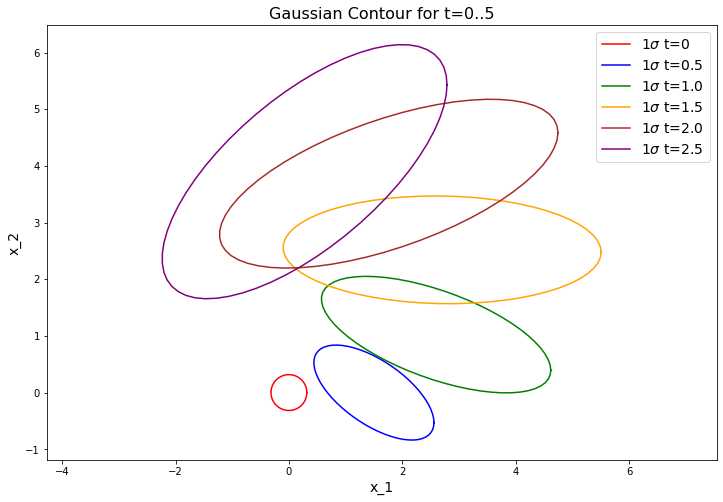

In [27]:
cov = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])

A = np.eye(3)
u = np.array([3, 1.5])
mean = np.array([0, 0, 0])

eta_mean = np.array([0, 0])
eta_cov = np.array([[2, 0], [0, 0.1]])


# plot the initial state
plt.figure(figsize=(12,8))
plt.title(r'Gaussian Contour for t=0..5', size=16)

plot2dcov(mean[:2], cov[:2, :2], color='r', label=f'{1}$\sigma$ t={0}')

cmap = ['b', 'g', 'orange', 'brown', 'purple']
for t in range(1, 6):
    B = np.array([[np.cos(mean[2]) * dt, 0], [np.sin(mean[2]) * dt, 0], [0, dt]])
    mean = A @ mean + B @ (u + eta_mean)
    G = np.array([[1, 0, -np.sin(mean[2]) * u[0] * dt], [0, 1, np.cos(mean[2]) * u[0] * dt], [0, 0, 1]])
    cov = G @ cov @ G.T + B @ eta_cov @ B.T
    plot2dcov(mean[:2], cov[:2, :2], color=cmap[t-1], label=f'{1}$\sigma$ t={t*dt}')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()

Both cases in E. and in D. look similar. In E. variance seems less than in D.